<a href="https://colab.research.google.com/github/budennovsk/AuthorBooksComments/blob/master/GAM_sku_v9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pygam


In [2]:
import pandas as pd
df_org = pd.read_excel('/content/Приволжский федеральный округ_X5_Дискаунтер_Сыр полутвёрдый.xlsx')

pd.options.display.float_format = '{:.10f}'.format

In [3]:
df_org

,Month,Year,Sku_name,Analytic1,Articul8,Brand,PRICE_PER_UNIT,SALES_VOL,SHARE_VOL_PROMO,SHARE_VOL
0,1,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1180.7812698413,31.5000000000,0.4553333333,0.0000800978
1,2,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1258.6229314421,25.3800000000,0.2653664303,0.0000698244
2,3,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1342.6359649123,13.6800000000,0.1445906433,0.0000422256
3,4,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1267.7443502820,21.2400000000,0.4506120527,0.0000664491
4,5,2022,Сыр полутвёрдый Alpina Мимолет Флоу-пак 180 г ...,180 г,Мимолет,Alpina,1236.0555555586,3.2400000000,0.5783950617,0.0000101936
...,...,...,...,...,...,...,...,...,...,...
2686,8,2023,Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200...,200 г,Эдам,Юговской КМП,640.7160931174,197.6000000000,0.2225050607,0.0004021874
2687,9,2023,Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200...,200 г,Эдам,Юговской КМП,641.9408468244,160.6000000000,0.2118368618,0.0003320128
2688,10,2023,Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200...,200 г,Эдам,Юговской КМП,739.1931034483,98.6000000000,0.1481947262,0.0002008410
2689,11,2023,Сыр полутвёрдый Юговской КМП Эдам Флоу-пак 200...,200 г,Эдам,Юговской КМП,741.5448640483,66.2000000000,0.1131419940,0.0001363060


In [4]:
df_org_top_25 = df_org.groupby(['Sku_name'])['SALES_VOL'].sum()
sku_top_25=df_org_top_25.sort_values(ascending=False).head(25)
sku_top_25
df_r = df_org['Sku_name'].apply(lambda x: x in sku_top_25.index.values)
df_org_1 = df_org[df_r].copy()
df_org_1['er']=df_org_1['SALES_VOL']/df_org_1['SALES_VOL'].sum()
df_org_2=df_org_1.reset_index()
df_org_2

,index,Month,Year,Sku_name,Analytic1,Articul8,Brand,PRICE_PER_UNIT,SALES_VOL,SHARE_VOL_PROMO,SHARE_VOL,er
0,78,1,2022,Сыр полутвёрдый Белебеевский Башкирский медовы...,190 г,Башкирский медовый,Белебеевский,745.1327929671,11639.0199999999,0.7439238871,0.0295955597,0.0012121215
1,79,1,2023,Сыр полутвёрдый Белебеевский Башкирский медовы...,190 г,Башкирский медовый,Белебеевский,860.0374076400,11560.7400000004,0.8964294673,0.0266813993,0.0012039692
2,80,1,2024,Сыр полутвёрдый Белебеевский Башкирский медовы...,190 г,Башкирский медовый,Белебеевский,843.5377182644,6448.6000000000,0.7812954750,0.0135853232,0.0006715760
3,81,2,2022,Сыр полутвёрдый Белебеевский Башкирский медовы...,190 г,Башкирский медовый,Белебеевский,851.4125058451,2694.5800000000,0.4483400010,0.0074132215,0.0002806214
4,82,2,2023,Сыр полутвёрдый Белебеевский Башкирский медовы...,190 г,Башкирский медовый,Белебеевский,873.3353889592,6615.9899999996,0.8532585448,0.0160432324,0.0006890085
...,...,...,...,...,...,...,...,...,...,...,...,...
693,2185,10,2023,Сыр полутвёрдый Село Зеленое Сметанковый Флоу-...,200 г,Сметанковый,Село Зеленое,735.2519856205,61003.6000000003,0.4941915559,0.1242598876,0.0063530931
694,2186,11,2022,Сыр полутвёрдый Село Зеленое Сметанковый Флоу-...,200 г,Сметанковый,Село Зеленое,700.5104959573,17908.8000000001,0.7177713191,0.0381230957,0.0018650747
695,2187,11,2023,Сыр полутвёрдый Село Зеленое Сметанковый Флоу-...,200 г,Сметанковый,Село Зеленое,735.3452506180,58331.7999999997,0.4945017640,0.1201053435,0.0060748440
696,2188,12,2022,Сыр полутвёрдый Село Зеленое Сметанковый Флоу-...,200 г,Сметанковый,Село Зеленое,683.8469551115,28733.4000000000,0.8530416171,0.0576415380,0.0029923802


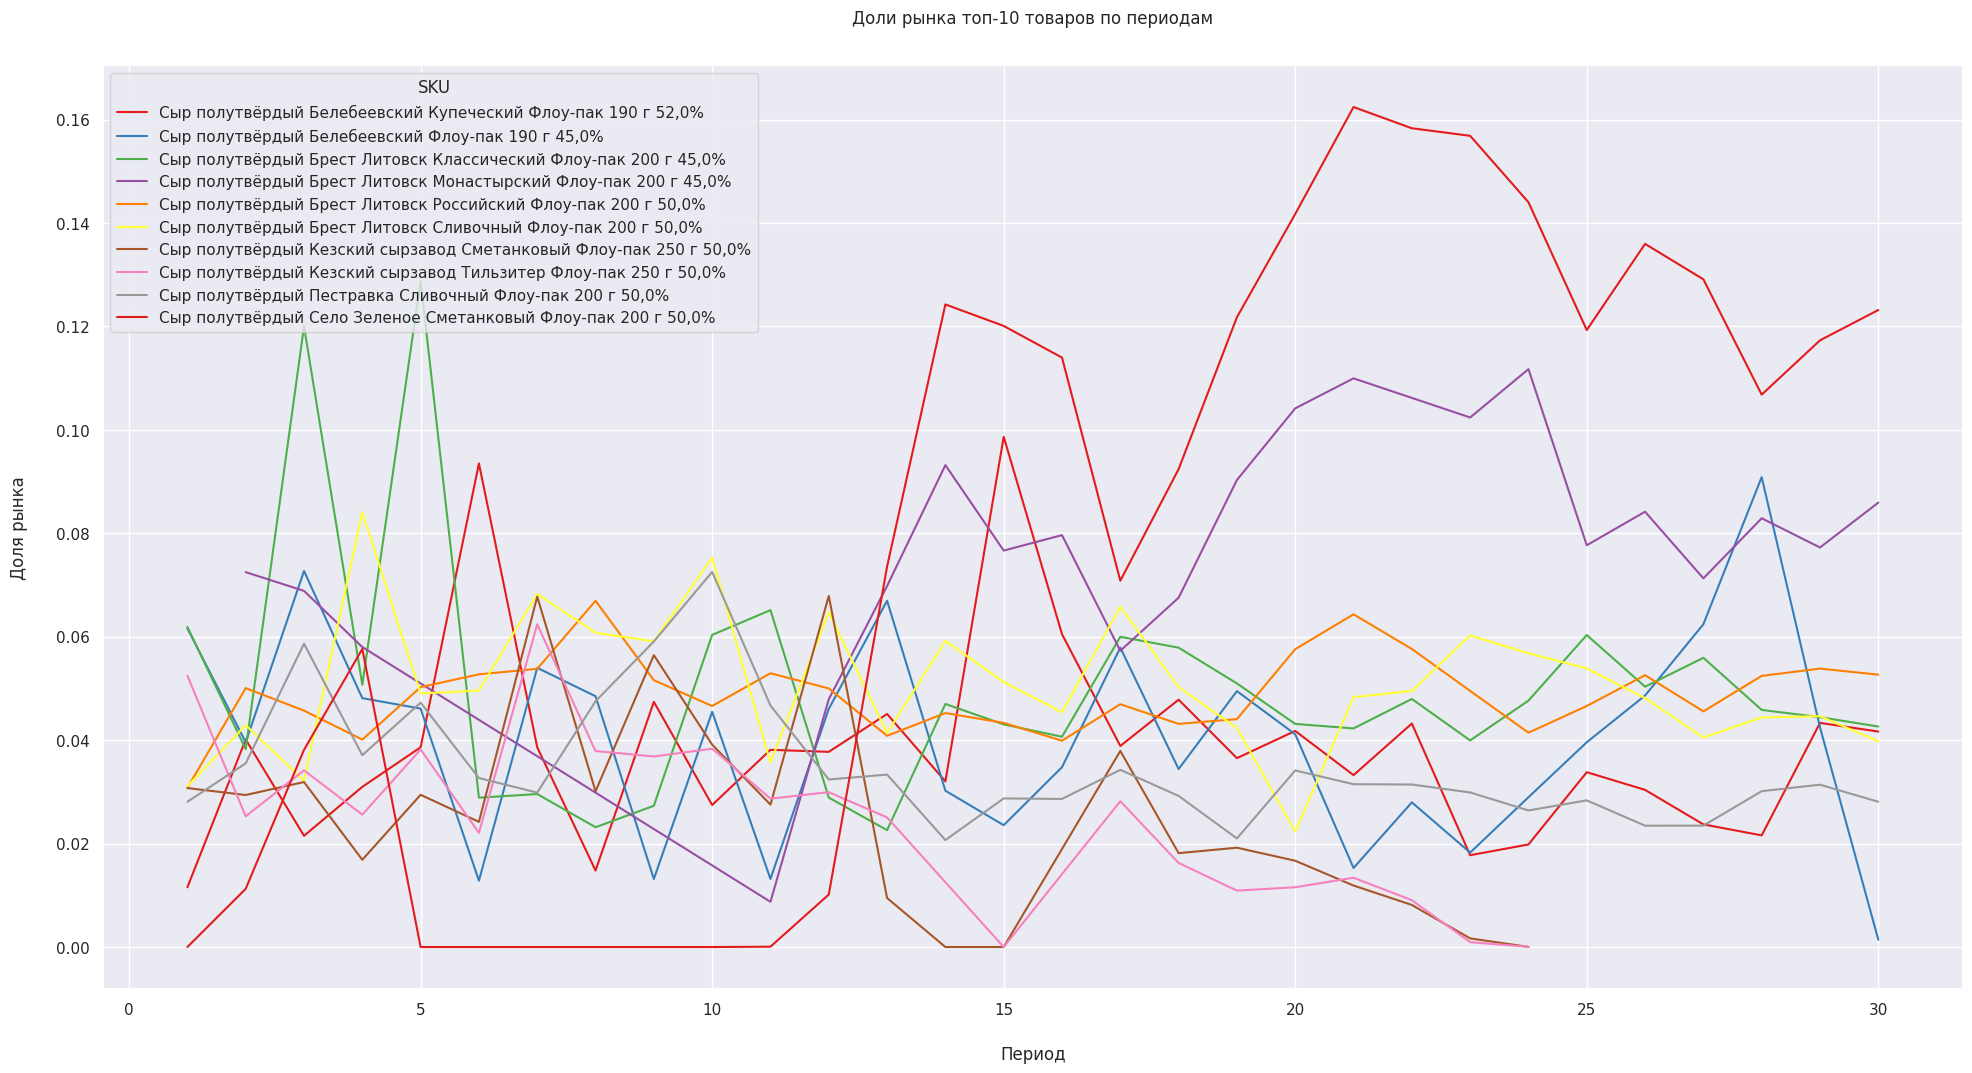

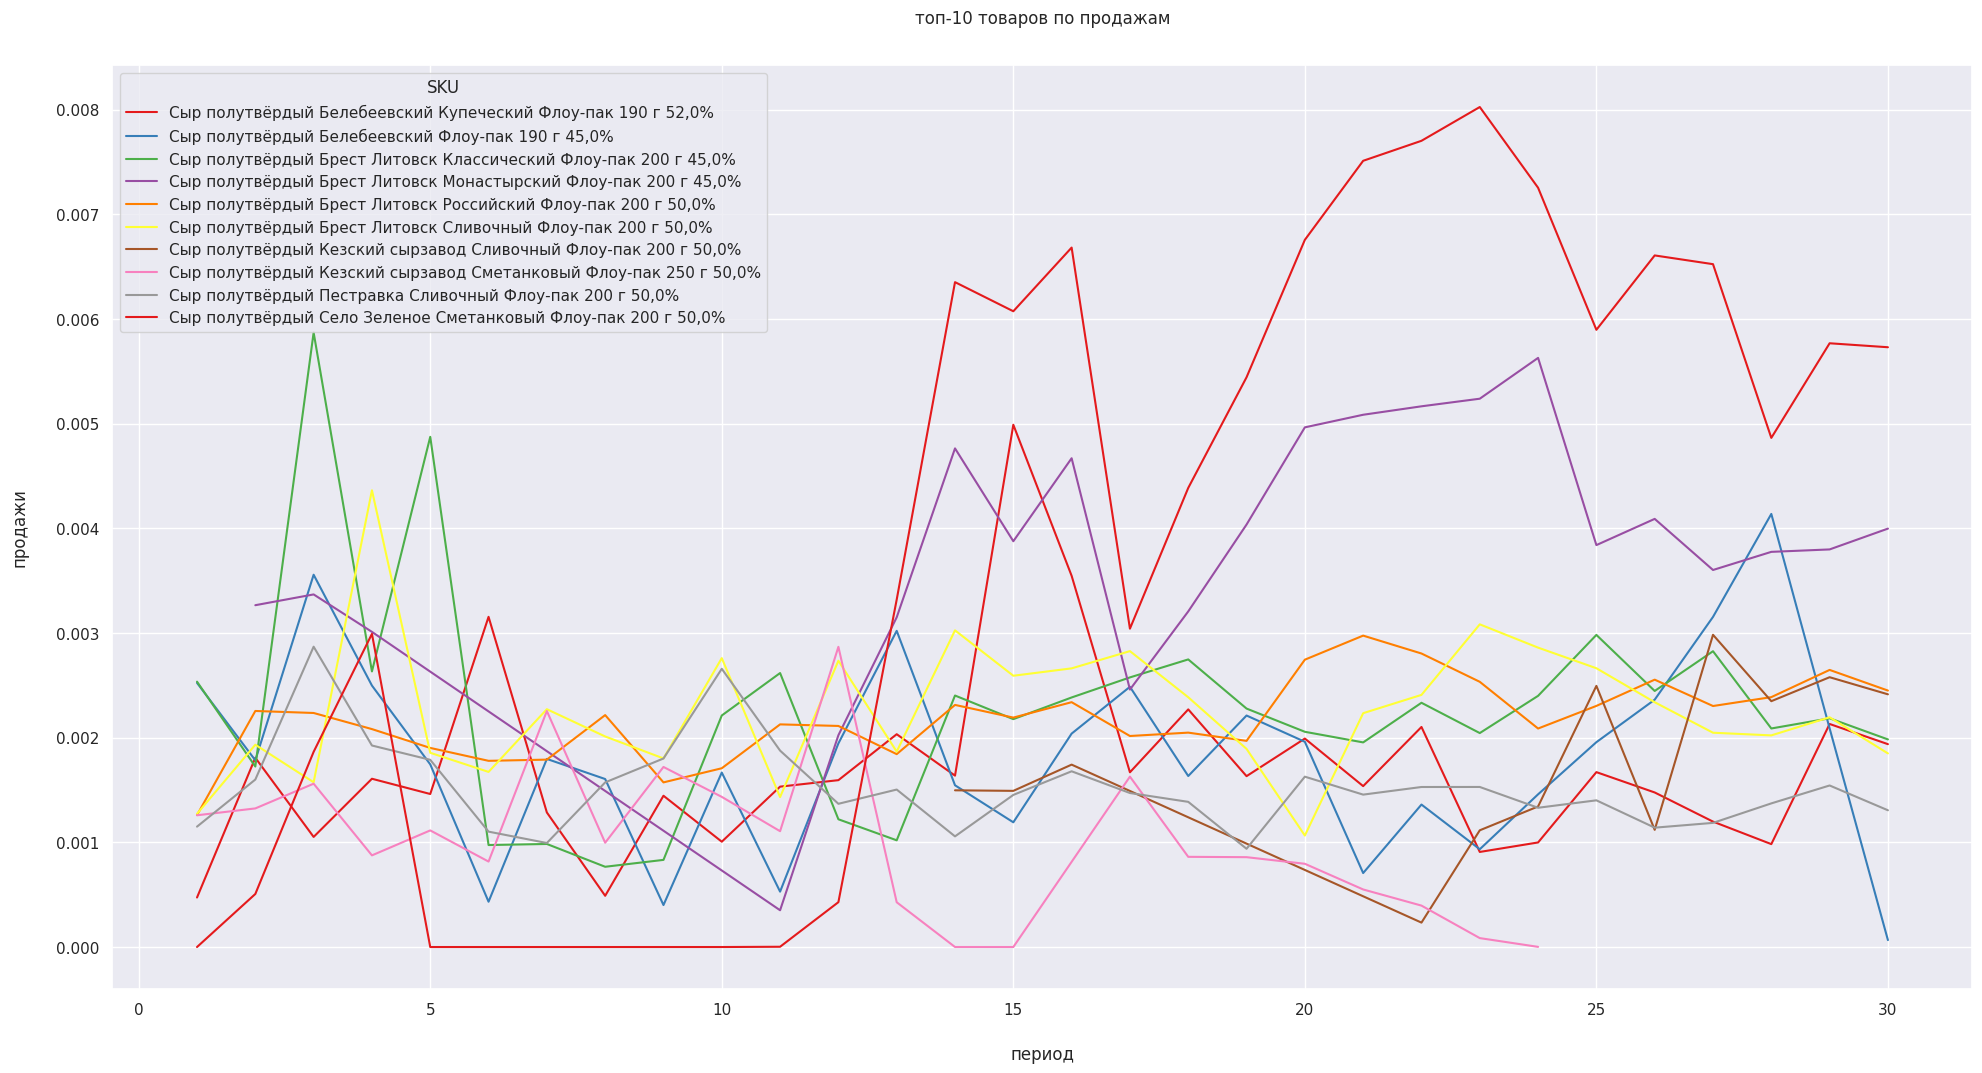

Базовая ску  Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    174.9514
Link Function:                     IdentityLink Log Likelihood:                                  -820.7096
Number of Samples:                          698 AIC:                                              1993.322
                                                AICc:                                            2112.8305
                                                GCV:                                                1.4541
                                                Scale:                                              0.8176
                                                Pseudo R-Squared:  

<ipython-input-5-d358cf029290>:345: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from pygam import LinearGAM, s, f
from sklearn.preprocessing import StandardScaler


if 'data' in locals():
    del data
data= df_org_2.copy()

if 2024 in data['Year'].unique().tolist():
  year_search=2024

else:
  year_search=2023


sns.set(style='darkgrid')

# Переименуем столбцы для удобства
data.rename(columns={
    'Month': 'month',
    'Year': 'year',
    'Sku_name': 'SKU',
    'Analytic1': 'Package_Info',
    'Articul8': 'Cheese_Type',
    'Brand': 'Brand',
    'PRICE_PER_UNIT': 'price_per_unit',
    'SALES_VOL': 'sales_volume',
    'SHARE_VOL_PROMO': 'promo_share',
    'SHARE_VOL': 'market_share_observed',
    'SHARE_VOL_SKU':'SHARE_VOL_SKU'
}, inplace=True)

#Создаем переменную 'period' на основе года и месяца
data['period'] = data['year'].astype(str) + '_' + data['month'].astype(str)
# Присваиваем уникальный номер каждому периоду
data['period'] = data['period'].astype('category').cat.codes + 1


# Шаг 1: Посчитаем количество периодов для каждого SKU
period_counts = data.groupby('SKU')['period'].nunique().reset_index()
period_counts.columns = ['SKU', 'period_count']

# Шаг 2: Найдем максимальное количество периодов
max_period_count = period_counts['period_count'].max()

# Шаг 3: Отфильтруем только те SKU, которые продавались в максимальное количество периодов
max_period_skus = period_counts[period_counts['period_count'] == max_period_count]

# Шаг 4: Соединим с исходными данными для получения среднего значения 'er'
grouped = data.groupby('SKU')['er'].mean().reset_index()

# Шаг 5: Оставим только те SKU, которые продавались в максимальное количество периодов
filtered_grouped = grouped[grouped['SKU'].isin(max_period_skus['SKU'])]

# Шаг 6: Найдем SKU с максимальным 'er'
max_sku = filtered_grouped.loc[filtered_grouped['er'].idxmax()]



#Функция для извлечения веса из строки
def extract_weight(package_info):
    import re
    match = re.search(r'(\d+)\s*г', package_info)
    if match:
        return int(match.group(1))
    else:
        return np.nan

# Применение функции к столбцу 'Package_Info'
data['Package_Weight'] = data['Package_Info'].apply(extract_weight)


res_data = data.copy()


# Заполняем пропущенные значения или удаляем строки с пропущенными значениями
data.dropna(inplace=True)
# # Выбираем только топ-10 SKU по максимальной доле рынка
plt.figure(figsize=(24, 12))
top_sku = data.groupby('SKU')['market_share_observed'].max().nlargest(10).index
filtered_data = data[data['SKU'].isin(top_sku)]

sns.lineplot(data=filtered_data, x='period', y='market_share_observed', hue='SKU', palette='Set1')
plt.title('Доли рынка топ-10 товаров по периодам', pad=30)  # Сдвиг заголовка
plt.xlabel('Период', labelpad=20)  # Сдвиг подписи оси X
plt.ylabel('Доля рынка', labelpad=20)  #
plt.show()



plt.figure(figsize=(24, 12))
top_sku = data.groupby('SKU')['er'].max().nlargest(10).index
filtered_data = data[data['SKU'].isin(top_sku)]

sns.lineplot(data=filtered_data, x='period', y='er', hue='SKU', palette='Set1')
plt.title('топ-10 товаров по продажам', pad=30)  # Сдвиг заголовка
plt.xlabel('период', labelpad=20)  # Сдвиг подписи оси X
plt.ylabel('продажи', labelpad=20)  #
plt.show()

# base_sku = 'Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%'
base_sku = max_sku['SKU']
# # base_sku='Сыр полутвёрдый Сыробогатов Королевский стандарт Топленое молоко Флоу-пак 180 г 40,0%'
print(f'Базовая ску  {base_sku}')

if base_sku not in data['SKU'].unique():
    raise ValueError(f"Базовый SKU '{base_sku}' не найден в данных.")

data_categor = pd.DataFrame()
# Преобразуем категориальную переменную в числовую
for cat_i in ['Package_Info', 'Cheese_Type', 'Brand','SKU']:
    data_categor[cat_i]=pd.Categorical(data[cat_i]).codes
data_categor.rename(columns={'SKU':'SKU_cat'},inplace=True)

data_del= data.drop(['Package_Info', 'Cheese_Type', 'Brand'],axis=1)

data = data_del.join(data_categor).copy()

# # Данные базового SKU
base_data = data[data['SKU'] == base_sku][['period', 'er']].rename(columns={'er': 'base_er'})

characteristics = ['promo_share','price_per_unit','Package_Info', 'Cheese_Type', 'Brand', 'SKU_cat']

base_data_only = data[data['SKU'] == base_sku][['period'] + characteristics].copy()

# Объединяем с основной таблицей
data = pd.merge(data, base_data, on='period', how='left')

# Удаляем строки, где нет данных базового SKU
data.dropna(subset=['base_er'], inplace=True)

data['log_share_ratio'] = np.log(data['er'] / data['base_er'])

ert = data.copy()

data_cat=data.copy()

base_characteristics = base_data_only.rename(columns=lambda x: 'base_' + x if x != 'period' else x)

# Объединяем базовые характеристики с основной таблицей
data = pd.merge(data_cat, base_characteristics, on='period', how='left', suffixes=('', '_base'))

# Вычисляем разности характеристик
for char in characteristics:
    data['delta_' + char] = data[char] - data['base_' + char]


# from sklearn.preprocessing import MinMaxScaler
data.to_excel('1q.xlsx')


data_test =data[data['year']<=2025].copy()
data =data[data['year']<=2025].copy()
# Установка случайного seed для воспроизводимости
# np.random.seed(42)

# # Случайное перемешивание индексов DataFrame
# indices = np.random.permutation(data.index)



# # Разделение индексов на тренировочные и тестовые
# split_point = int(0.8 * len(data))  # 80% тренировочных данных, 20% тестовых
# train_indices = indices[:split_point]


# # Разделение DataFrame на тренировочные и тестовые данные
# data_train = data.loc[train_indices]

# data_test = data[~data.index.isin(data_train.index)]
# data = data_train.copy()

# model_data = data[data['SKU'] != base_sku].copy()


# X_columns = ['delta_' + char for char in characteristics]

y = data['log_share_ratio']
X =  data[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat']]
y.to_excel('q4.xlsx')

# # # scaler = MinMaxScaler()
scaler = StandardScaler()

# # Applying normalization to the selected columns
normalized_data = pd.DataFrame(scaler.fit_transform(X[['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat']]), columns=['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat'])
del_data = X.drop(['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat'],axis=1).reset_index(drop=True)
X=del_data.join(normalized_data)

# # Определим сетку гиперпараметров для поиска
# #_______________________
# from sklearn.model_selection import KFold, cross_val_score

# from pygam import LinearGAM, s, f
# import numpy as np
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error

# # Определим формулу для модели LinearGAM
# lam_values = np.logspace(-3, 3, 10)  # значения регуляризации
# n_splines_values = [5, 10, 20]  # значения для количества сплайнов для s-функций

# # Настраиваем кросс-валидацию
# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# # Списки для сохранения средних ошибок и гиперпараметров
# mean_rmse = []

# print("Начало кросс-валидации для подбора параметров сглаживания...")

# # Кросс-валидация и подбор гиперпараметров
# for n_splines in n_splines_values:
#     for lam in lam_values:
#         fold_rmse = []

#         # Проходим по всем фолдам кросс-валидации
#         for train_idx, val_idx in cv.split(X):
#             # Разбиваем данные на обучающие и тестовые
#             X_train, X_val = X.values[train_idx], X.values[val_idx]
#             y_train, y_val = y.values[train_idx], y.values[val_idx]

#             # Создаем новую модель для каждой итерации
#             gam = LinearGAM(s(0, n_splines=n_splines) + s(1, n_splines=n_splines) + f(2) + f(3) + f(4) + f(5), lam=lam)
#             gam.fit(X_train, y_train)

#             # Прогнозируем на валидационных данных
#             y_pred = gam.predict(X_val)

#             # Считаем RMSE для каждого фолда
#             rmse = np.sqrt(mean_squared_error(y_val, y_pred))
#             fold_rmse.append(rmse)

#         # Сохраняем среднее значение RMSE для текущих гиперпараметров
#         mean_rmse.append({
#             'n_splines': n_splines,
#             'lam': lam,
#             'mean_rmse': np.mean(fold_rmse)
#         })

# # Найдем гиперпараметры с минимальным RMSE
# best_params = min(mean_rmse, key=lambda x: x['mean_rmse'])
# best_n_splines = best_params['n_splines']
# best_lam = best_params['lam']

# print(f"Оптимальное значение n_splines: {best_n_splines}, Оптимальное значение ламбда: {best_lam}")

# # Обучаем модель с оптимальными гиперпараметрами на всех данных
# gam = LinearGAM(s(0, n_splines=best_n_splines) + s(1, n_splines=best_n_splines) + f(2) + f(3) + f(4) + f(5), lam=best_lam)
# gam.fit(X.values, y.values)

# # Прогнозируем систематическую утилиту
# data['V'] = gam.predict(X.values)
# # #_______________________



# # Задаем сетку значений для гиперпараметров
# lam_values = np.logspace(-3, 3, 30)  # значения регуляризации
# n_splines_values = [5, 10, 20,100]  # значения для количества сплайнов для s-функций

# # Список для сохранения ошибок RMSE и гиперпараметров
# mean_rmse = []

# print("Подбор параметров сглаживания без кросс-валидации...")

# # Перебираем значения параметров n_splines и lam
# for n_splines in n_splines_values:
#     for lam in lam_values:
#         # Создаем и обучаем модель с текущими значениями гиперпараметров
#         gam = LinearGAM(s(0, n_splines=n_splines) + s(1, n_splines=n_splines) + f(2) + f(3) + f(4) + f(5), lam=lam)
#         gam.fit(X.values, y.values)

#         # Прогнозируем и вычисляем ошибку RMSE на тех же данных
#         y_pred = gam.predict(X.values)
#         rmse = np.sqrt(mean_squared_error(y.values, y_pred))

#         # Сохраняем значения гиперпараметров и RMSE
#         mean_rmse.append({
#             'n_splines': n_splines,
#             'lam': lam,
#             'rmse': rmse
#         })

# # Выбираем комбинацию параметров с минимальным RMSE
# best_params = min(mean_rmse, key=lambda x: x['rmse'])
# best_n_splines = best_params['n_splines']
# best_lam = best_params['lam']

# print(f"Оптимальное значение n_splines: {best_n_splines}, Оптимальное значение ламбда: {best_lam}")

# # Обучаем модель с оптимальными гиперпараметрами на всех данных
# gam = LinearGAM(s(0, n_splines=best_n_splines) + s(1, n_splines=best_n_splines) + f(2) + f(3) + f(4) + f(5), lam=best_lam)
# gam.fit(X.values, y.values)

# # Прогнозируем систематическую утилиту
# data['V'] = gam.predict(X.values)
# data.loc[data['SKU'] == base_sku, 'V'] = 0
# data['pred_market_share'] = np.exp(data['V']) * data['base_er']

# # #_________________
# gam = LinearGAM(s(0)+s(1)+f(2) + f(3) + f(4)+f(5)).fit(X, y)

# # gam = LinearGAM(f(0) + f(1) + f(2)+s(3)+s(4)).fit(X, y)
# gam.gridsearch(X, y)

# # # #__________
# # # Прогнозируем систематическую утилиту
# data['V'] = gam.predict(X)
# data.loc[data['SKU'] == base_sku, 'V'] = 0
# # Обратное преобразование логарифмического отношения к реальным значениям продаж
# # data['pred_market_share'] = np.exp(data['V']) * data['base_sales_volume']


# # Восстановление предсказанных значений доли продаж SKU
# data['pred_market_share'] = np.exp(data['V']) * data['base_er']
# # #____________________


optimal_n_splines = 100
optimal_lam = 0.01
gam = LinearGAM(
    s(0, n_splines=optimal_n_splines) +
    s(1, n_splines=optimal_n_splines) +
    f(2) +
    f(3) +
    f(4) +
    f(5),
    lam=optimal_lam
)

# # Прогнозируем систематическую утилиту
gam.fit(X.values, y.values)
# gam.gridsearch(X, y)
data['V'] = gam.predict(X)
data.loc[data['SKU'] == base_sku, 'V'] = 0
# Обратное преобразование логарифмического отношения к реальным значениям продаж
data['pred_market_share'] = np.exp(data['V']) * data['base_er']


gam.summary()

In [19]:
max_sku['er']

0.0022713807079174507

In [6]:
true_pred =data.groupby('SKU')['pred_market_share'].sum()
true_pred



,pred_market_share
SKU,
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0262949288
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0254531153
"Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%",0.0240121936
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.0504955956
"Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%",0.0383580938
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.0578623309
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.0681414212
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.0384203089
"Сыр полутвёрдый Брест Литовск Маасдам Флоу-пак 200 г 45,0%",0.0351854652


In [7]:
true_pred.sum()


0.9677543679601988

In [8]:
import pandas as pd
mean_org = pd.DataFrame()
mean_org['org_market_share'] = df_org_2.groupby('Sku_name')['er'].sum()
mean_org['org_market_share']

,org_market_share
Sku_name,
"Сыр полутвёрдый Белебеевский Башкирский медовый Флоу-пак 190 г 50,0%",0.0253429132
"Сыр полутвёрдый Белебеевский Благородный дуэт Флоу-пак 190 г 50,0%",0.0258889793
"Сыр полутвёрдый Белебеевский Голландский Флоу-пак 190 г 45,0%",0.0257391905
"Сыр полутвёрдый Белебеевский Купеческий Флоу-пак 190 г 52,0%",0.0516341257
"Сыр полутвёрдый Белебеевский Российский Флоу-пак 190 г 50,0%",0.0350071575
"Сыр полутвёрдый Белебеевский Флоу-пак 190 г 45,0%",0.0548101026
"Сыр полутвёрдый Брест Литовск Классический Флоу-пак 200 г 45,0%",0.0681414212
"Сыр полутвёрдый Брест Литовск Легкий Флоу-пак 200 г 35,0%",0.0360098101
"Сыр полутвёрдый Брест Литовск Маасдам Флоу-пак 200 г 45,0%",0.0333719949


In [9]:
mean_org['org_market_share'].sum()

1.0000000000000002

In [10]:
# mean_market_shares
# mean_org

# market_share_before,new_df
from sklearn.metrics import mean_absolute_error, r2_score
# Расчет MAE
mae = mean_absolute_error(mean_org['org_market_share'].values,true_pred.to_frame()['pred_market_share'].values)
print(f'MAE: {mae:.2f}')

# Расчет R²
r2 = r2_score(mean_org['org_market_share'].values,true_pred.to_frame()['pred_market_share'].values)
# print(f'R²: {r2:.2f}')

# Расчет WAPE
wape = sum(abs(mean_org['org_market_share'].values - true_pred.to_frame()['pred_market_share'].values) / sum(mean_org['org_market_share'].values))
print(f'WAPE: {wape:.2f}')

# Количество наблюдений и количество предикторов
n = len(mean_org)  # количество наблюдений
p = 1  # количество предикторов (в данном случае это предсказанная доля рынка)

# Вычисление скорректированного R²
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Вывод значений R² и R²_adj
print(f'R²: {r2:.2f}')
print(f'R² Adjusted: {r2_adj:.2f}')

MAE: 0.00
WAPE: 0.12
R²: 0.80
R² Adjusted: 0.79


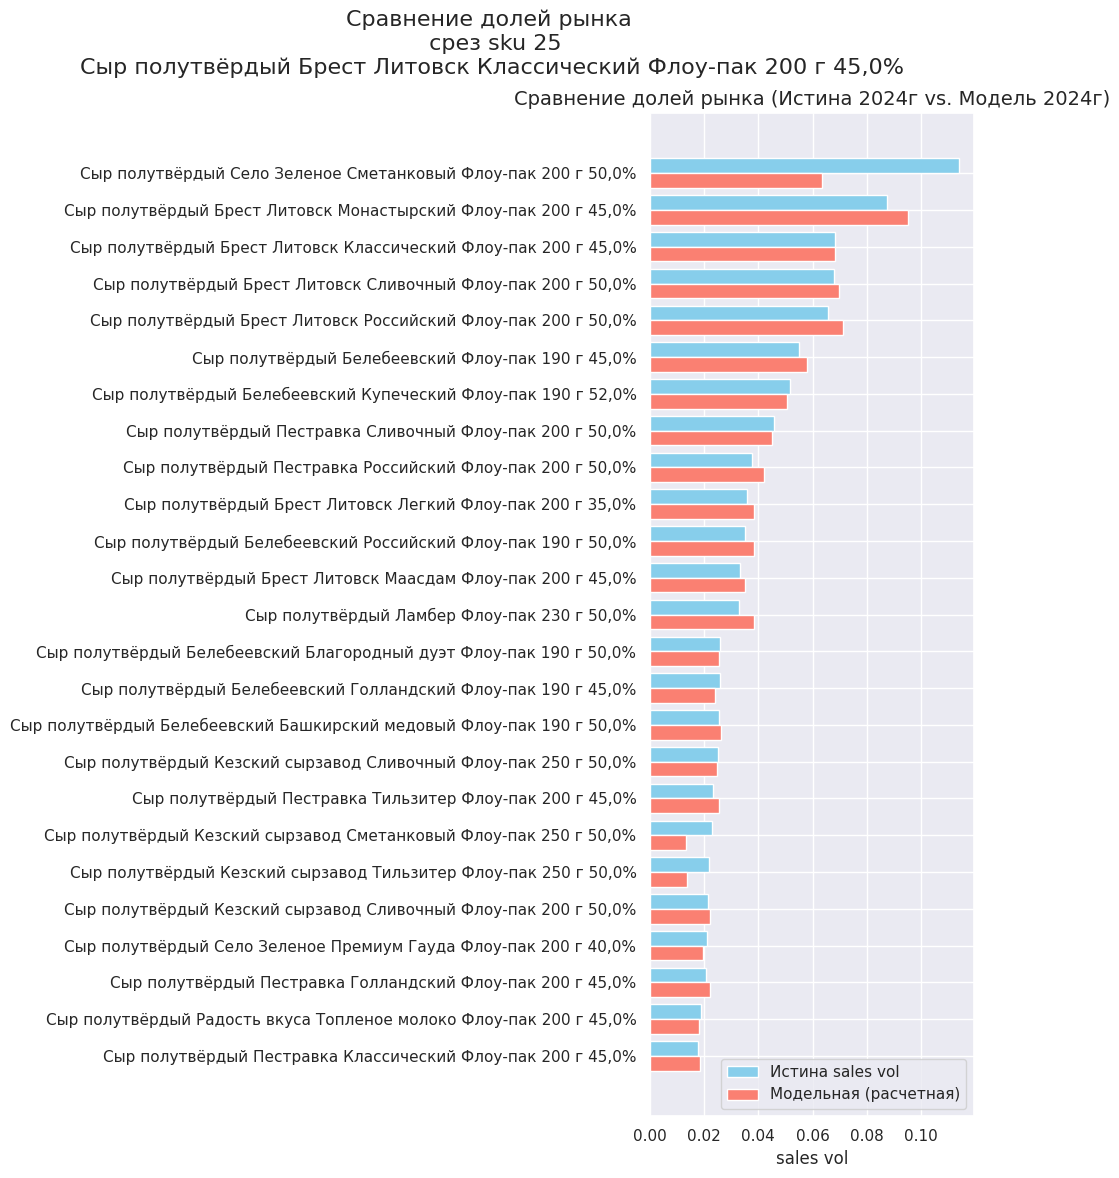

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Функция для построения горизонтальной диаграммы с фильтрацией меток по доле рынка
def plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org, sizes_pred, labels, title, min_share=0.10):
    # Фильтрация меток, отображаем только те, у которых доля >= min_share
    filtered_labels = [label if size_org >= min_share or size_pred >= min_share else '' for label, size_org, size_pred in zip(labels, sizes_org, sizes_pred)]
    filtered_sizes_org = [size_org if size_org >= min_share else 0 for size_org in sizes_org]
    filtered_sizes_pred = [size_pred if size_pred >= min_share else 0 for size_pred in sizes_pred]

    # Позиции по оси Y для меток
    y_pos = np.arange(len(filtered_sizes_org))

    # Построение горизонтальной столбчатой диаграммы для исходных данных
    ax.barh(y_pos - 0.2, filtered_sizes_org, height=0.4, color='skyblue', label='Истина sales vol')
    # Построение горизонтальной столбчатой диаграммы для предсказанных данных
    ax.barh(y_pos + 0.2, filtered_sizes_pred, height=0.4, color='salmon', label='Модельная (расчетная)')

    # Установка меток на оси Y
    ax.set_yticks(y_pos)
    ax.set_yticklabels(filtered_labels)
    ax.invert_yaxis()  # Инвертируем ось Y, чтобы самые большие значения были сверху
    ax.set_xlabel('sales vol')
    ax.set_title(title, fontsize=14)
    ax.legend()
    return ax

# Извлечение данных для построения диаграмм
sizes_org = mean_org['org_market_share'].values
sizes_pred = true_pred.to_frame()['pred_market_share'].values
labels_org = mean_org.index.values
top_25=25
# Сортировка по убыванию относительно sizes_org
sorted_indices = np.argsort(sizes_org)[::-1]  # Индексы отсортированных значений по убыванию
sizes_org_sorted = sizes_org[sorted_indices][:top_25]
sizes_pred_sorted = sizes_pred[sorted_indices][:top_25]
labels_org_sorted = labels_org[sorted_indices][:top_25]

# Построение горизонтальной диаграммы с фильтрацией меток
fig, ax = plt.subplots(figsize=(10, 12))  # Увеличенный размер для удобного отображения меток
plot_horizontal_bar_chart_with_filtered_labels(ax, sizes_org_sorted, sizes_pred_sorted, labels_org_sorted, f'Сравнение долей рынка (Истина 2024г vs. Модель 2024г)', min_share=0.0)

# Общий заголовок
plt.suptitle(f'Сравнение долей рынка \n срез sku {top_25}\n{base_sku}', fontsize=16)
plt.tight_layout()
plt.show()


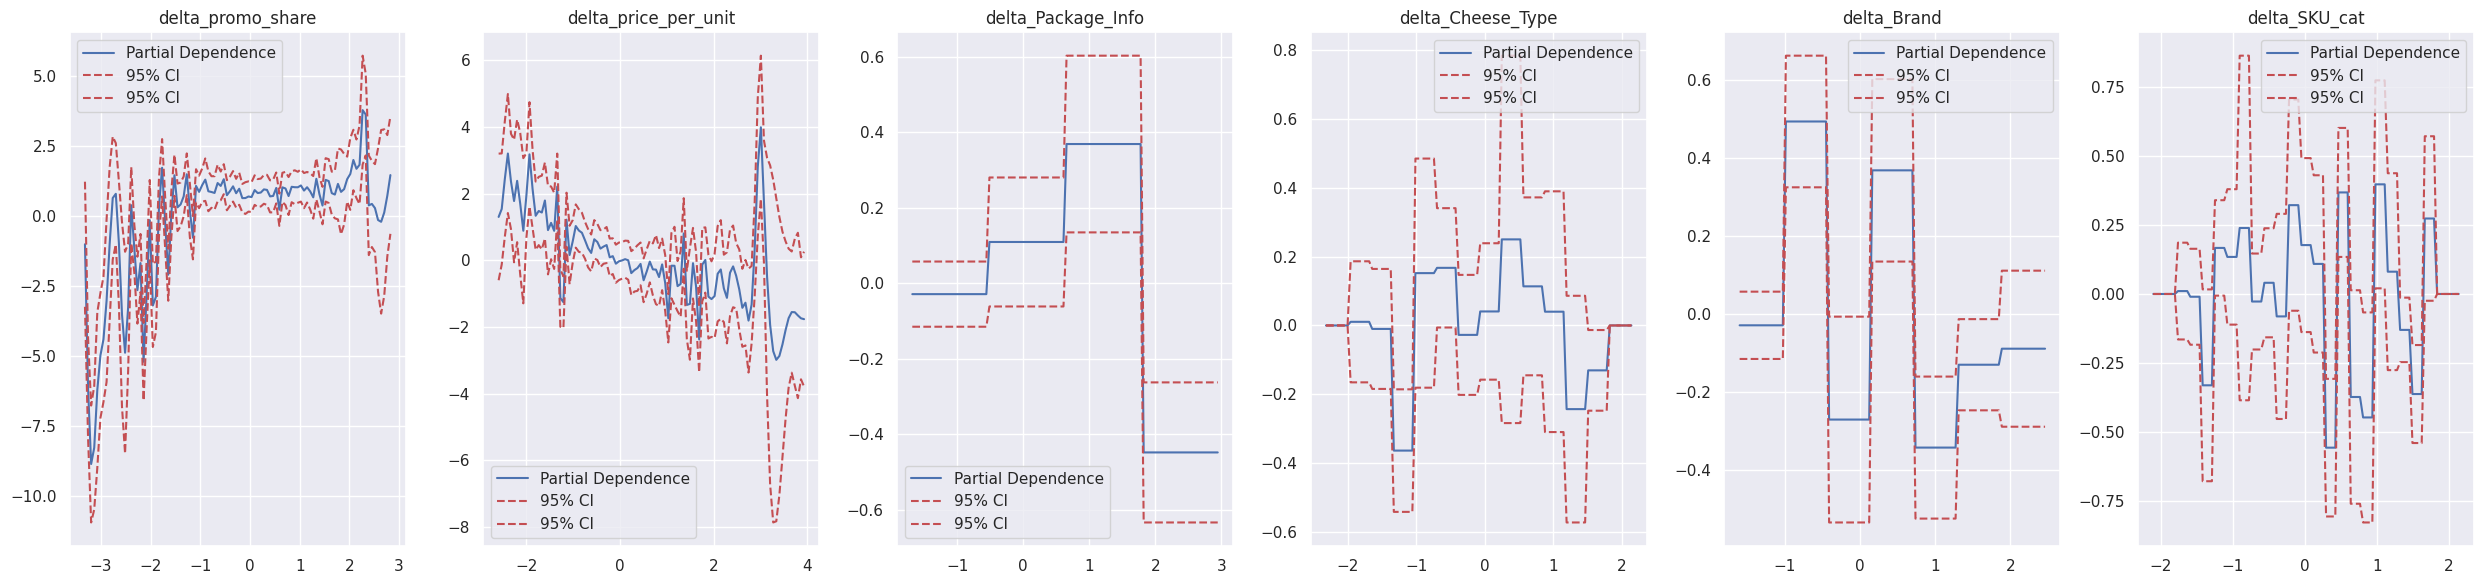

In [12]:
from pygam import LinearGAM, s, f
from pygam.datasets import wage

titles = ['delta_promo_share','delta_price_per_unit','delta_Package_Info', 'delta_Cheese_Type', 'delta_Brand','delta_SKU_cat']

# Создание подграфиков с заданным размером фигуры
fig, axs = plt.subplots(1, 6, figsize=(25, 6))  # Ширина 25 дюймов и высота 5 дюймов

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pd = gam.partial_dependence(term=i, X=XX)
    ppd = gam.partial_dependence(term=i, X=XX, width=.95)

    ax.plot(XX[:, i], pd, label='Partial Dependence')
    ax.plot(XX[:, i], ppd[1], c='r', ls='--', label='95% CI')


    ax.set_title(titles[i])
    ax.legend()

plt.tight_layout()
plt.show()

In [13]:
X.describe()

,delta_promo_share,delta_price_per_unit,delta_Package_Info,delta_Cheese_Type,delta_Brand,delta_SKU_cat
count,698.0000000000,698.0000000000,698.0000000000,698.0000000000,698.0000000000,698.0000000000
mean,0.0000000000,0.0000000000,0.0000000000,-0.0000000000,0.0000000000,0.0000000000
std,1.0007171030,1.0007171030,1.0007171030,1.0007171030,1.0007171030,1.0007171030
min,-3.3216037352,-2.5906599021,-1.1811617995,-1.8203606853,-1.1036218644,-1.6070075595
25%,-0.5970271870,-0.6018206779,-1.1811617995,-0.7564195019,-1.1036218644,-0.9315340701
50%,-0.0119569761,-0.1174488004,0.0277105407,0.0415363857,-0.5924552676,-0.1209658828
75%,0.6471959471,0.4300851181,0.0277105407,0.8394922733,0.9410445227,0.9597917003
max,2.8245332005,3.9276514638,2.4454552212,1.6374481609,1.9633777163,1.6352651897
